## AutoEncoder

https://pebpung.github.io/autoencoder/2021/09/11/Auto-Encoder-1.html

- representation learning: 숨겨진 구조/특성을 찾는 학습
    - AutoEncoder : encoder & decoder
- 데이터를 통해서 데이터 특징 찾아서 **단순화**(특성을 압축 compresssion)하고 다시 **특징을 복원**(reconstruction)
- data sepecific - 데이터마다 모델이 상이함
 - 데이터를 압축해도 학습 형태와 유사함
 - 일반적 압축 알고리즘과 상이함

### 3요소
- encoding func
- decoding func
- loss func: 원본에 대해 압축된 표현


- keras blog, Building AutoEncoders in Keras 참고:  
https://blog.keras.io/building-autoencoders-in-keras.html
  > - badly outdated

- 논문 참고: Recent advnaces in AutoEncoder-based Representation Learning(2018)  
    - 비지도학습: 특정 지식이 생기면 바탕으로 자기학습
    - unlabelled data 훨씬 더 많음

In [1]:
import tensorflow as tf

In [2]:
(X_train,_),(X_test,_) = tf.keras.datasets.mnist.load_data() # 비지도 학습

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape(-1,28*28)
X_train = X_train/255.

X_test = X_test.reshape(-1,28*28)
X_test = X_test/255.
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


### Simple AutoEncoder
- semi-supervised
- 784개 입력 데이터를 32개로 줄어들었다가 다시 784로 복원
- 잘 되었는지 확인하기 위해서 이진분류를 위해서 sigmoid

In [ ]:
inputs = tf.keras.layers.Input((784,))
encoder = tf.keras.layers.Dense(32,activation='relu')(inputs)      # 784-->32  , 압축
decoder = tf.keras.layers.Dense(784,activation='sigmoid')(encoder) # 32 -->784 , 복원

autoencoder = tf.keras.models.Model(inputs,decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy') # 이진 분류

비지도학습
- 학습 데이터만 가져오기 때문에 답을 모른채 데이터의 특성을 파악해서 학습

In [ ]:
# 학습  : CPU 약 6~7분
autoencoder.fit(X_train,X_train,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.2226
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1080
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0967
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0952
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0944
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0941
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0939
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0939
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0936
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0936
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0935
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0935
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0934
Epoch 14/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0935
Epoch 15/50
1875/1875 ━━━━━

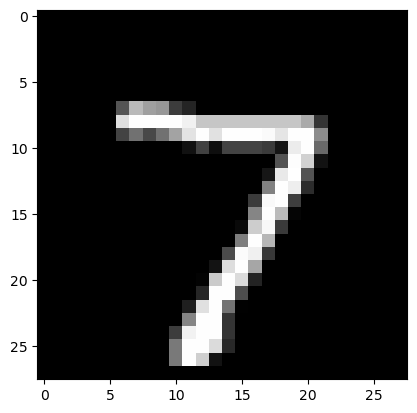

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28,28),cmap='gray'); # 7

In [ ]:
encoder

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, name=keras_tensor_4>

In [ ]:
autoencoder.layers

[<InputLayer name=input_layer_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [ ]:
encoder_layer = autoencoder.layers[1]

In [ ]:
import numpy as np
X_test[0][np.newaxis].shape

(1, 784)

In [ ]:
encoder_layer(X_test[0][np.newaxis])  # 이미지 압축 (1,784) --> (1,32)

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[ 4.478483  ,  1.7689962 ,  5.3217974 ,  5.455795  ,  1.9315706 ,
         3.6612768 ,  3.9799695 ,  0.6141116 , 11.890504  ,  8.156432  ,
         3.76018   ,  2.4882948 ,  2.6938057 ,  3.1818733 ,  3.092862  ,
         5.3131256 ,  4.8020706 ,  0.19445229,  6.763791  ,  3.296471  ,
         5.003613  ,  4.3839364 ,  4.977975  ,  4.354518  ,  3.0859709 ,
         4.7857785 ,  2.9649534 ,  3.2551963 ,  6.347815  ,  0.27851737,
         4.9177413 ,  2.8940697 ]], dtype=float32)>

In [ ]:
autoencoder(X_test[0][np.newaxis])  # (1, 784)

<tf.Tensor: shape=(1, 784), dtype=float32, numpy=
array([[1.56838903e-10, 1.31712904e-10, 6.97974734e-10, 1.09014235e-10,
        2.34883335e-10, 2.13179099e-10, 1.65247802e-10, 1.51683027e-10,
        1.11313336e-09, 2.85811930e-10, 1.97044520e-10, 3.59430624e-10,
        6.97269662e-13, 4.10676083e-17, 6.39637054e-18, 1.43071861e-12,
        3.48480411e-10, 3.05954373e-10, 1.62614200e-10, 1.93472668e-10,
        2.59044231e-10, 6.08211093e-10, 3.18354010e-10, 1.25922245e-10,
        4.28194591e-10, 1.29092209e-10, 1.58502225e-10, 8.74116404e-11,
        1.10621394e-10, 1.23776253e-10, 2.59101574e-10, 2.70424849e-10,
        7.41351858e-12, 3.16205638e-11, 5.99610250e-10, 4.76710407e-11,
        2.41984523e-11, 1.56777820e-11, 5.54798785e-09, 7.01548331e-09,
        1.21532107e-09, 1.40189371e-11, 2.73046290e-11, 9.78375922e-11,
        1.25307100e-11, 1.24339540e-11, 1.72264616e-11, 5.95179017e-10,
        2.86713903e-10, 2.46828957e-09, 1.43304018e-08, 2.47611243e-09,
        1.9041

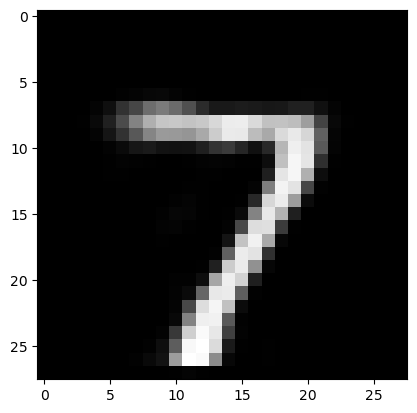

In [ ]:
decoder_image = autoencoder(X_test[0][np.newaxis]).numpy()
plt.imshow(decoder_image.reshape(28,28),cmap='gray');  # 7로 보임

### Deep Autoencoder
- encoder, decoder 레이어 한개로 784 -> 32차원으로 바꾸려 하니 잘 안됨
- 레이어를 깊게 쌓으면 비선형성을 높여 성능 향상

In [ ]:
input_image = tf.keras.layers.Input((784,))
encoded = tf.keras.layers.Dense(256,activation='relu')(input_image)
encoded = tf.keras.layers.Dense(128,activation='relu')(encoded)
encoded = tf.keras.layers.Dense(64,activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32,activation='relu')(encoded)

# 역순
decoded = tf.keras.layers.Dense(64,activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128,activation='relu')(decoded)
decoded = tf.keras.layers.Dense(256,activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784,activation='sigmoid')(decoded)

autoencoder = tf.keras.models.Model(input_image,decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 489,136 (1.87 MB)

 Trainable params: 489,136 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# CPU 약 16분 소요 , GPU 약 2분 소요
autoencoder.fit(X_train,X_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - loss: 0.3293
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1543
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1324
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1223
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1160
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1117
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1081
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1058
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1034
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1016
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1001
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0986
Epoch 13/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0977
Epoch 14/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0963
Epoch 15/100
235

- 특징을 잘 압축해서 복원함
- 딥러닝으로 representation learning도 발전

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


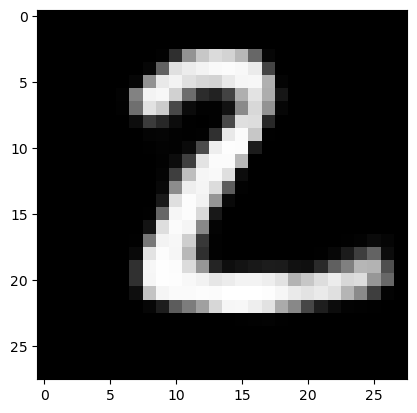

In [ ]:
x_ = autoencoder.predict(X_test)[1]
plt.imshow(x_.reshape(28,28),cmap='gray')

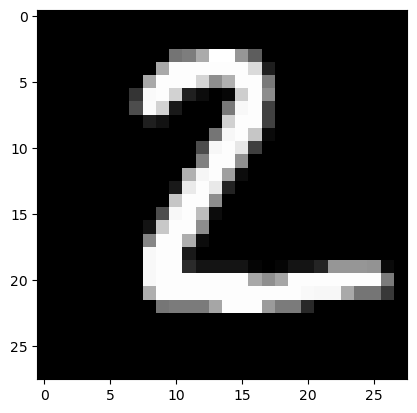

In [ ]:
plt.imshow(X_test[1].reshape(28,28),cmap='gray') #원본

### Convolutional Autoencoder
 - 입력: 3차원 이미지 데이터

In [3]:
(X_train,_),(X_test,_) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1,28,28,1)
X_train = X_train/255.

X_test = X_test.reshape(-1,28,28,1)
X_test = X_test/255.
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 복원
- up sampling: 크기 늘리는것
  - 원본을 유지
  - `UpSampling2D` 학습을 통해서 늘림
- CNN: 크기는 줄어들지만 원래 원본 이미지의 특성을 간직하고 flatten해서 예측했더니 FCNN보다 성능이 좋음

In [ ]:
b = np.arange(24).reshape(1,2,4,3)  # 2,3,4 이미지 1개
b

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]]]])

In [ ]:
a = tf.keras.layers.UpSampling2D((2,1)) # height 2배
a(b)

<tf.Tensor: shape=(1, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]]]])>

In [ ]:
a = tf.keras.layers.UpSampling2D((1,3)) # width 3배
a(b)

<tf.Tensor: shape=(1, 2, 12, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 0,  1,  2],
         [ 0,  1,  2],
         [ 3,  4,  5],
         [ 3,  4,  5],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 6,  7,  8],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [ 9, 10, 11],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [12, 13, 14],
         [12, 13, 14],
         [15, 16, 17],
         [15, 16, 17],
         [15, 16, 17],
         [18, 19, 20],
         [18, 19, 20],
         [18, 19, 20],
         [21, 22, 23],
         [21, 22, 23],
         [21, 22, 23]]]])>

In [4]:
import keras
from keras import layers
#입력 크기 맞추기 위해서 padding ='same'

input_img = keras.Input(shape=(28, 28, 1))
# encoder
x = layers.Conv2D(16,(3,3),activation='relu' ,padding='same')(input_img)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(8,(3,3),activation='relu' ,padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(8,(3,3),activation='relu' ,padding='same')(x)
encoded = layers.MaxPooling2D((2,2),padding='same')(x)

# decoder : 가짜데이터 생성
x = layers.Conv2D(8,(3,3),activation='relu' ,padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8,(3,3),activation='relu' ,padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8,(3,3),activation='relu')(x)  # (N-F)/Strides + 1 = (16-3)/1 +1 = 14
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1,(3,3),activation='sigmoid' ,padding='same')(x)

autoencoder = keras.Model(input_img,decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,729 (14.57 KB)

 Trainable params: 3,729 (14.57 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# CPU 약 25~30분 소요/GPU 약 3~4분 소요
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.4012
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1604
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1414
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1327
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1271
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1233
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1200
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1174
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1150
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1135
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1121
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1109
Epoch 13/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1099
Epoch 14/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1090
Epoch 15/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


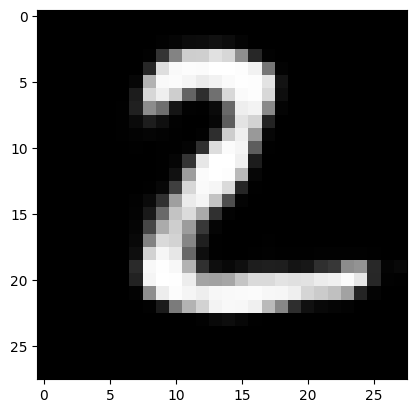

In [7]:
import matplotlib.pyplot as plt
x_ = autoencoder.predict(X_test)[1]
plt.imshow(x_.reshape(28,28),cmap='gray')  # 2

### Denoising
- 이미지 데이터의 noise 넣고 학습하면 랜덤한 패턴때문에 고유특성이 아니라고 생각하여 제거됨

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# numpy.clip(array, min, max)
#     array 내의 element들에 대해서
#     min 값 보다 작은 값들을 min값으로 바꿔주고
#     max 값 보다 큰 값들을 max값으로 바꿔주는 함수.
import numpy as np
arr1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
arr2 = np.clip(arr1, 3, 7)
print(arr2)

[3 3 3 3 4 5 6 7 7 7]


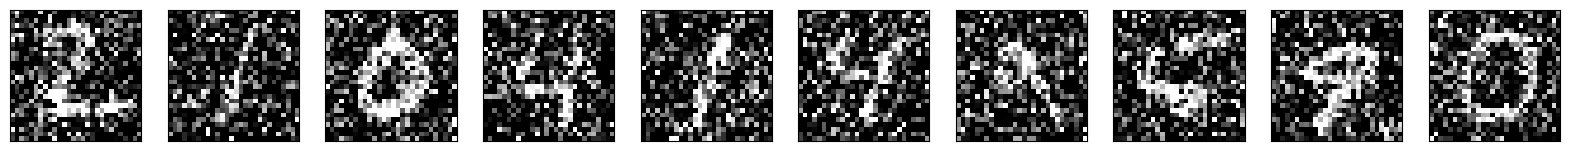

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()  #데이터에 노이즈를 줌